<a href="https://colab.research.google.com/github/saniyatfk28/Weather-analysis/blob/main/Weather_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Weather DataSet is a time-series dataset with hourly-based information

Data available :  

MinTemp - The Minimum temperature during a particular day. (degree Celsius)



MaxTemp - The maximum temperature during a particular day. (degree Celsius)



Rainfall - Rainfall during a particular day. (millimeters)



Evaporation - Evaporation during a particular day. (millimeters)



Sunshine - Bright sunshine during a particular day. (hours)



WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)



WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)



WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)



WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)



WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)



WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)



Humidity9am - The humidity of the wind at 9 am. (percent)



Humidity3pm - The humidity of the wind at 3 pm. (percent)



Pressure9am - Atmospheric pressure at 9 am. (hectopascals)



Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)



Cloud9am- Cloud-obscured portions of the sky at 9 am. (eighths)



Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)



Temp9am - The temperature at 9 am. (degree Celsius)



Temp3pm - The temperature at 3 pm. (degree Celsius)



RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Load the data
df = pd.read_csv('Weather_Data.csv')


In [7]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert data types
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y') # Change %Y to %y to handle two-digit years

# Explore the data
print(df.head())
print(df.describe())

        Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall RainToday  \
0 2013-02-01     20.7     20.9     19.5     22.4      15.6       Yes   
1 2013-02-02     22.4     24.8     19.5     25.6       6.0       Yes   
2 2013-02-03     23.5     23.0     21.6     24.5       6.6       Yes   
3 2013-02-04     21.4     20.9     20.2     22.8      18.8       Yes   
4 2013-02-05     22.5     25.5     19.7     25.7      77.4       Yes   

   Evaporation  Sunshine WindGustDir  ...  WindDir9am WindDir3pm WindSpeed9am  \
0          6.2       0.0           W  ...           S        SSW           17   
1          3.4       2.7           W  ...           W          E            9   
2          2.4       0.1           W  ...         ESE        ESE           17   
3          2.2       0.0           W  ...         NNE          E           22   
4          4.8       0.0           W  ...         NNE          W           11   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \

<ipython-input-7-37603de0c75d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Average Minimum Temperature: 14.877101803729746
Average Maximum Temperature: 23.00556404769184


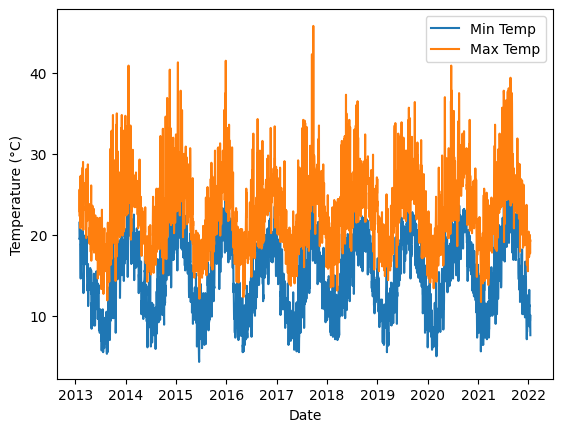

In [8]:
# Analyze temperature patterns
avg_min_temp = df['MinTemp'].mean()
avg_max_temp = df['MaxTemp'].mean()
print("Average Minimum Temperature:", avg_min_temp)
print("Average Maximum Temperature:", avg_max_temp)

plt.plot(df['Date'], df['MinTemp'], label='Min Temp')
plt.plot(df['Date'], df['MaxTemp'], label='Max Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [9]:
# Analyze rainfall patterns
total_rainfall = df['Rainfall'].sum()
print("Total Rainfall:", total_rainfall)

rainy_days = df[df['RainToday'] == 'Yes'].shape[0]
print("Rainy Days:", rainy_days)

Total Rainfall: 10932.2
Rainy Days: 849


In [10]:
# Analyze wind patterns
avg_wind_speed_9am = df['WindSpeed9am'].mean()
avg_wind_speed_3pm = df['WindSpeed3pm'].mean()
print("Average Wind Speed at 9 AM:", avg_wind_speed_9am)
print("Average Wind Speed at 3 PM:", avg_wind_speed_3pm)

wind_dir_counts = df['WindDir9am'].value_counts()
print("Wind Direction Counts at 9 AM:")
print(wind_dir_counts)


Average Wind Speed at 9 AM: 15.077040660348517
Average Wind Speed at 3 PM: 19.294405380617548
Wind Direction Counts at 9 AM:
WindDir9am
W      1260
WNW     485
SSW     185
S       156
E       141
ESE     134
SSE     121
NNW     103
N       100
SE      100
WSW      97
NNE      89
NW       85
NE       80
ENE      79
SW       56
Name: count, dtype: int64


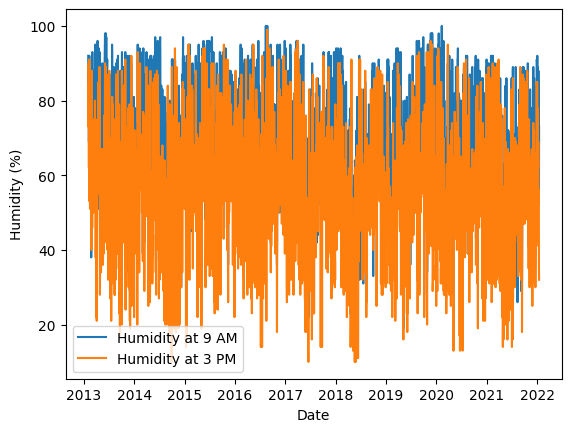

In [11]:
# Explore other variables
plt.plot(df['Date'], df['Humidity9am'], label='Humidity at 9 AM')
plt.plot(df['Date'], df['Humidity3pm'], label='Humidity at 3 PM')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()#line plot


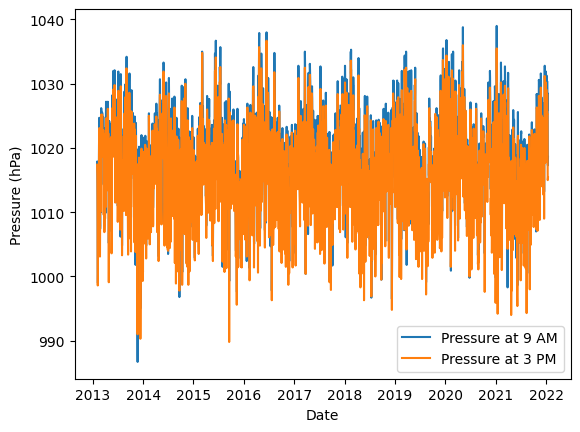

In [16]:
plt.plot(df['Date'], df['Pressure9am'], label='Pressure at 9 AM')
plt.plot(df['Date'], df['Pressure3pm'], label='Pressure at 3 PM')
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.legend()
plt.show()#line plot


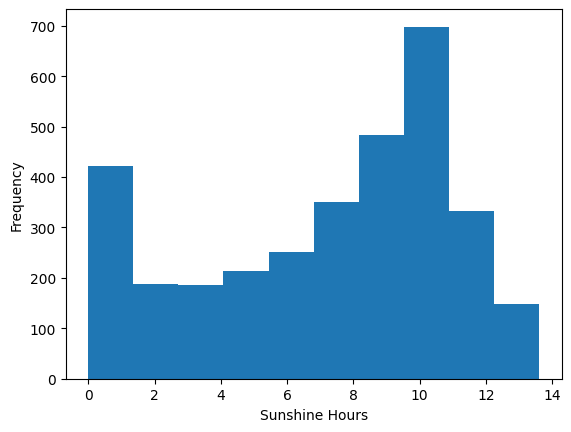

In [15]:
plt.hist(df['Sunshine'], bins=10)
plt.xlabel('Sunshine Hours')
plt.ylabel('Frequency')
plt.show()#bar graph